In [ ]:
# INF2178 Assignment 1 Code
# Songjia Liu 1005137503

In [34]:
# Step One：Load Dataset

In [1]:
#Imput some Python-based data analysis toolkits
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load dataset
data_name = 'INF2178_A1_data.xlsx'
df = pd.read_excel(data_name)

# Understand the structure of the dataset
df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [27]:
#Step Two: Data Cleaning

In [2]:
# Select columns that are needed
filter_columns = ['SECTOR','CAPACITY_TYPE', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT',
                    'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']
df = df[filter_columns]
df.head(10)

,SECTOR,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Families,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0
1,Mixed Adult,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0
2,Men,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0
3,Mixed Adult,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0
4,Women,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0
5,Mixed Adult,Bed Based Capacity,Emergency,6,8.0,6.0,NaN,NaN
6,Families,Room Based Capacity,Emergency,120,NaN,NaN,46.0,44.0
7,Families,Room Based Capacity,Emergency,130,NaN,NaN,46.0,44.0
8,Mixed Adult,Room Based Capacity,Emergency,153,NaN,NaN,145.0,145.0
9,Men,Room Based Capacity,Emergency,40,NaN,NaN,41.0,40.0


In [4]:
# Check for missing values
print(df.isnull().sum())

SECTOR                      0
CAPACITY_TYPE               0
PROGRAM_MODEL               2
SERVICE_USER_COUNT          0
CAPACITY_ACTUAL_BED     18545
OCCUPIED_BEDS           18545
CAPACITY_ACTUAL_ROOM    32399
OCCUPIED_ROOMS          32399
dtype: int64


In [5]:
# Display basic statistics
df.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000
mean,45.727171,31.627149,29.780271,55.549259,52.798598
std,53.326049,27.127682,26.379416,59.448805,58.792954
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,15.000000,14.000000,19.000000,16.000000
50%,28.000000,25.000000,23.000000,35.000000,34.000000
75%,51.000000,43.000000,41.000000,68.000000,66.000000
max,339.000000,234.000000,234.000000,268.000000,268.000000


In [6]:
# Calculate occupancy rates where data is available
# For Bed Based Capacity
df['BED_OCCUPANCY_RATE'] = df['OCCUPIED_BEDS'] / df['CAPACITY_ACTUAL_BED']

# For Room Based Capacity
df['ROOM_OCCUPANCY_RATE'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM']

# Drop the rows where both occupancy rates are NaN because they can't be used in t-tests
df_clean = df.dropna(subset=['BED_OCCUPANCY_RATE', 'ROOM_OCCUPANCY_RATE'], how='all')

# Check the cleaned data and the new occupancy rate columns
df_clean[['BED_OCCUPANCY_RATE', 'ROOM_OCCUPANCY_RATE']].describe()



,BED_OCCUPANCY_RATE,ROOM_OCCUPANCY_RATE
count,32399.000000,18545.000000
mean,0.927885,0.934087
std,0.122562,0.163241
min,0.022727,0.012048
25%,0.900000,0.958333
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.014085


In [ ]:
# Step Three: T-Test

In [ ]:
# 1. T-Test for PROGRAM_MODEL with BED_OCCUPANCY_RATE:

In [7]:
# Perform two-sample t-test to compare the 'BED OCCUPANCY RATE' between 'Emergency' and 'Transitional' program models 

emergency_bed = df[df['PROGRAM_MODEL'] == 'Emergency']['BED_OCCUPANCY_RATE']
transitional_bed = df[df['PROGRAM_MODEL'] == 'Transitional']['BED_OCCUPANCY_RATE']

t_stat, p_val = stats.ttest_ind(emergency_bed, transitional_bed, nan_policy='omit')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))


t-statistic = 38.780694714817365
p-value = 0.0


In [30]:
# 2. T-Test for PROGRAM_MODEL with ROOM_OCCUPANCY_RATE:

In [8]:
# Perform two-sample t-test to compare the 'ROOM OCCUPANCY RATE' between 'Emergency' and 'Transitional' program models 

emergency_room = df[df['PROGRAM_MODEL'] == 'Emergency']['ROOM_OCCUPANCY_RATE']
transitional_room = df[df['PROGRAM_MODEL'] == 'Transitional']['ROOM_OCCUPANCY_RATE']

t_stat, p_val = stats.ttest_ind(emergency_room, transitional_room, nan_policy='omit')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))


t-statistic = 18.903262158430557
p-value = 5.923255977527666e-79


In [ ]:
# 3. T-Test for PROGRAM_MODEL with SERVICE_USER_COUNT:

In [9]:
# Perform two-sample t-test to compare the 'SERVICE USER COUNT' between 'Emergency' and 'Transitional' program models 

emergency_user = df[df['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT']
transitional_user = df[df['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT']

t_stat, p_val = stats.ttest_ind(emergency_user, transitional_user, nan_policy='omit')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))


t-statistic = 29.937570467283667
p-value = 3.1720139638162956e-195


In [ ]:
# Step Four: Explratory data analysis(EDA)

In [11]:
# Define function for summary statistics - methods given by professor
def get_summary_statistics(dataset):
    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)

In [12]:
# Get summary statistic for Room Occupancy Rate
print('Room Occupancy Rate summary statistics')
get_summary_statistics(df['ROOM_OCCUPANCY_RATE'])

Room Occupancy Rate summary statistics
Min: 0.01
Mean: 0.93
Max: 1.01
25th percentile: 0.96
Median: nan
75th percentile: 1.0
Interquartile range (IQR): 0.04


In [13]:
# Get summary statistic for Bed Occupancy Rate
print('Bed Occupancy Rate summary statistics')
get_summary_statistics(df['BED_OCCUPANCY_RATE'])

Bed Occupancy Rate summary statistics
Min: 0.02
Mean: 0.93
Max: 1.0
25th percentile: 0.9
Median: nan
75th percentile: 1.0
Interquartile range (IQR): 0.1


In [14]:
# Summary statistics for numerical columns - method more easier
summary_statistics = df.describe()
summary_statistics

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,BED_OCCUPANCY_RATE,ROOM_OCCUPANCY_RATE
count,50944.000000,32399.000000,32399.000000,18545.000000,18545.000000,32399.000000,18545.000000
mean,45.727171,31.627149,29.780271,55.549259,52.798598,0.927885,0.934087
std,53.326049,27.127682,26.379416,59.448805,58.792954,0.122562,0.163241
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.022727,0.012048
25%,15.000000,15.000000,14.000000,19.000000,16.000000,0.900000,0.958333
50%,28.000000,25.000000,23.000000,35.000000,34.000000,1.000000,1.000000
75%,51.000000,43.000000,41.000000,68.000000,66.000000,1.000000,1.000000
max,339.000000,234.000000,234.000000,268.000000,268.000000,1.000000,1.014085


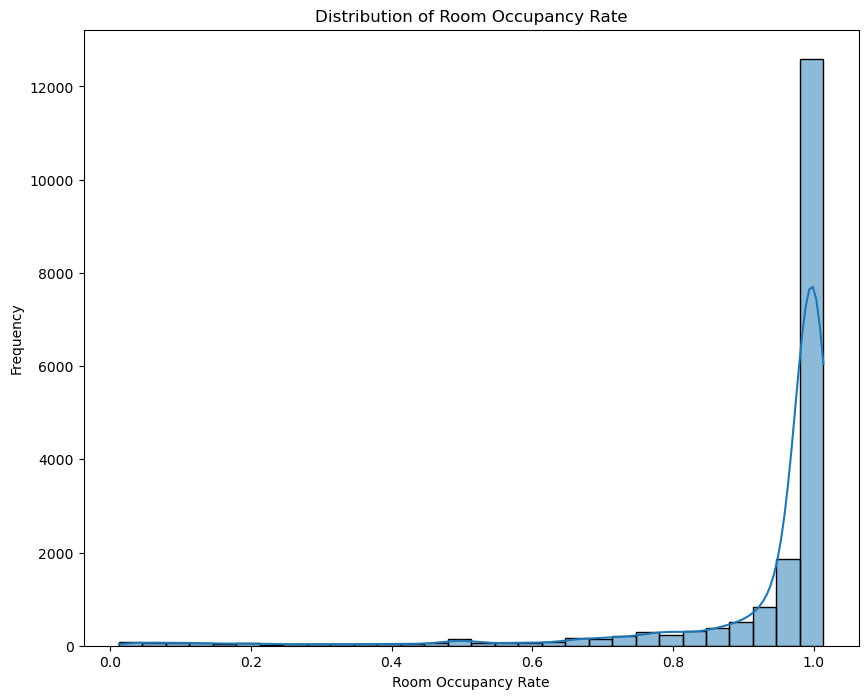

In [15]:
# Create histogram for Room Occupancy Rate
plt.figure(figsize=(10, 8))
sns.histplot(df['ROOM_OCCUPANCY_RATE'], bins=30, kde=True)
plt.title('Distribution of Room Occupancy Rate')
plt.xlabel('Room Occupancy Rate')
plt.ylabel('Frequency')
plt.show()

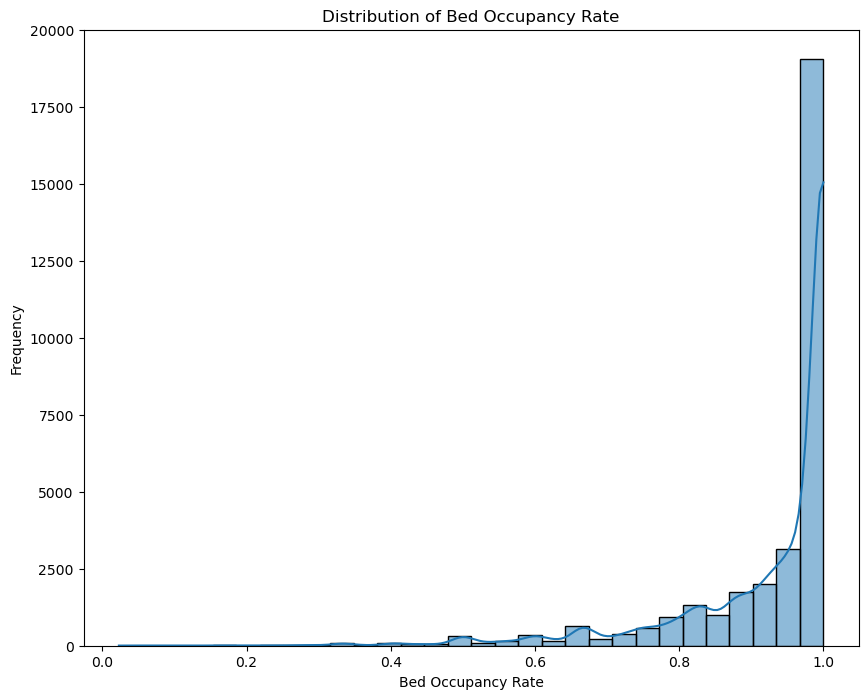

In [16]:
# Create histogram for Bed Occupancy Rate
plt.figure(figsize=(10, 8))
sns.histplot(df['BED_OCCUPANCY_RATE'], bins=30, kde=True)
plt.title('Distribution of Bed Occupancy Rate')
plt.xlabel('Bed Occupancy Rate')
plt.ylabel('Frequency')
plt.show()

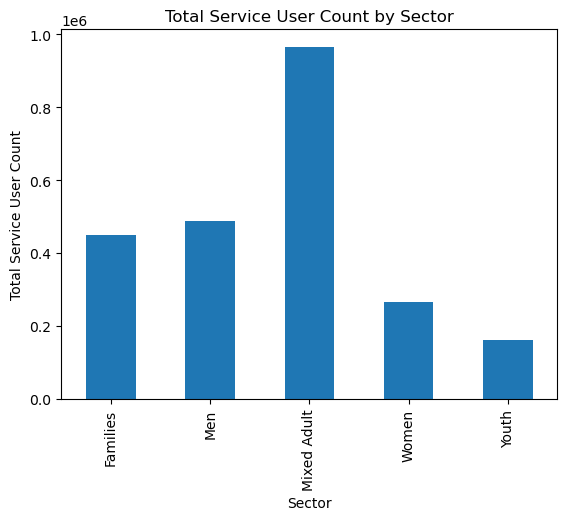

In [17]:
# Create a bar plot to show the distribution of service user count by different sectors.
sector_sum = df.groupby('SECTOR')['SERVICE_USER_COUNT'].sum()

sector_sum.plot(kind='bar')
plt.title('Total Service User Count by Sector')
plt.xlabel('Sector')
plt.ylabel('Total Service User Count')
plt.show()

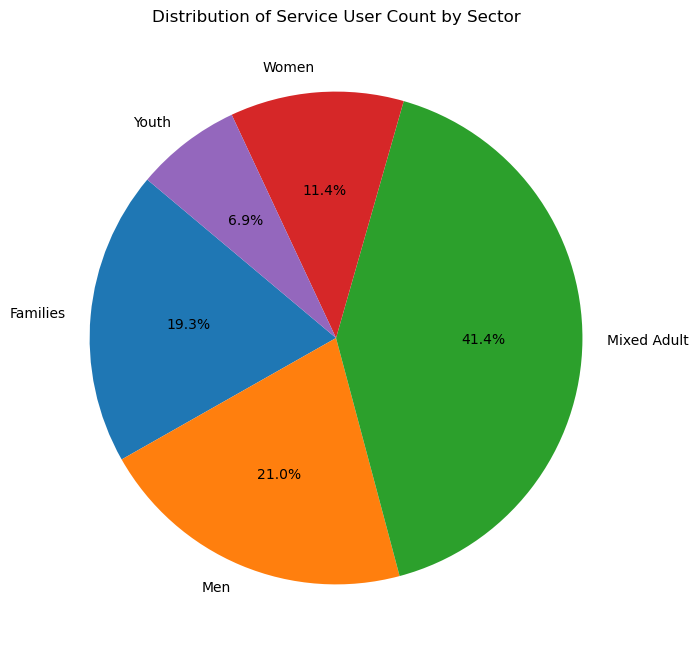

In [19]:
# Create a pie chart to show the percentage of service user count by different sectors.
sector_counts = df.groupby('SECTOR')['SERVICE_USER_COUNT'].sum()

plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Service User Count by Sector')
plt.show()

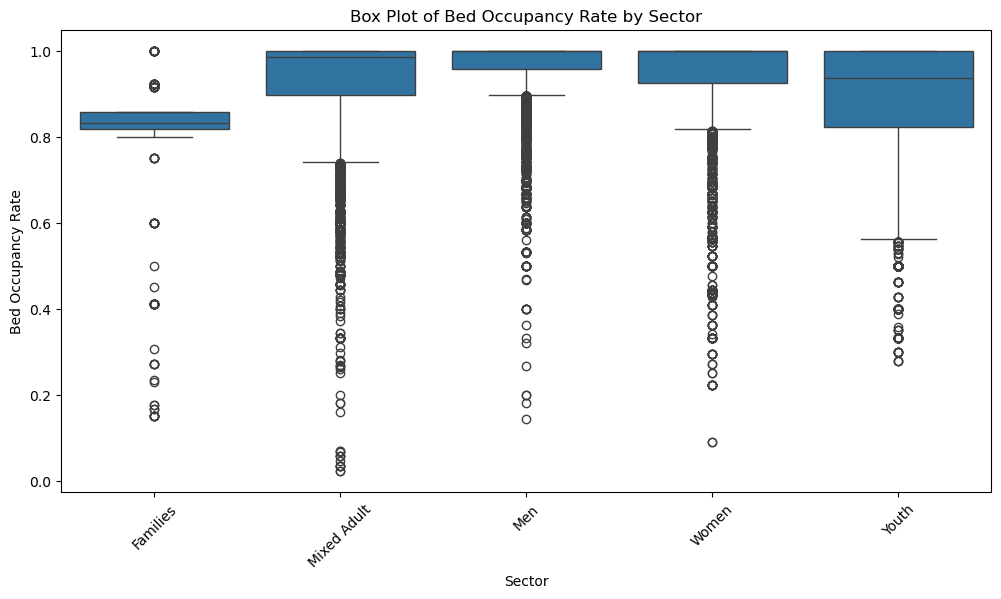

In [21]:
# Create a box plot to show the summary statistics of bed occupancy rate by sector.
plt.figure(figsize=(12, 6))
sns.boxplot(x='SECTOR', y='BED_OCCUPANCY_RATE', data=df)
plt.title('Box Plot of Bed Occupancy Rate by Sector')
plt.xlabel('Sector')
plt.ylabel('Bed Occupancy Rate')
# Rotates the labels on the x-axis for better readability
plt.xticks(rotation=45)  
plt.show()


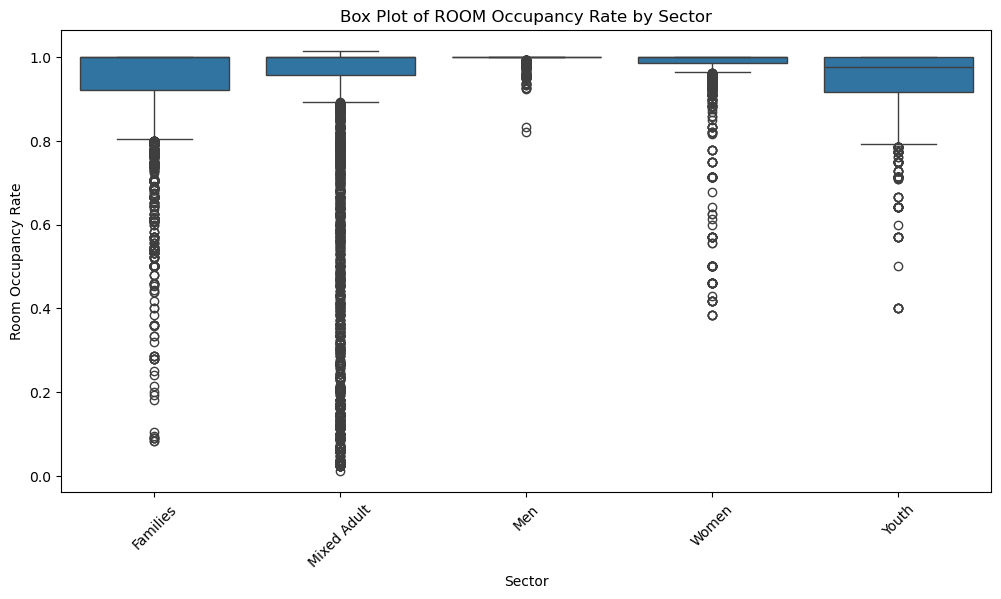

In [22]:
# Create a box plot to show the summary statistics of room occupancy rate by sector.
plt.figure(figsize=(12, 6))
sns.boxplot(x='SECTOR', y='ROOM_OCCUPANCY_RATE', data=df)
plt.title('Box Plot of ROOM Occupancy Rate by Sector')
plt.xlabel('Sector')
plt.ylabel('Room Occupancy Rate')
# Rotates the labels on the x-axis for better readability
plt.xticks(rotation=45)  
plt.show()
